In [1]:
import matplotlib.pyplot as plt
import numpy as np

import soundfile as sf
import torch
import torchaudio
PATH = './data/acriil_ang_00000001.raw'

# data: data_pkl에 저장되어있는 벡터
data, samplerate  = sf.read(PATH, channels=1, samplerate=16000,
                  format='RAW', subtype='PCM_16')
print(data.shape)

(107743,)


In [2]:
audio = torch.tensor(data.astype(np.float32)).cpu().detach()
audio2mfcc = torchaudio.transforms.MFCC(sample_rate=16000,
                                    n_mfcc= 40,
                                    log_mels=False,
                                    melkwargs = {'n_fft': 1024})
mfcc = audio2mfcc(audio)
# dim, seq_len
print(mfcc.shape)
mfcc

torch.Size([40, 211])


tensor([[-4.4177e+02, -4.6738e+02, -4.6898e+02,  ..., -4.7594e+02,
         -4.7297e+02, -4.7214e+02],
        [ 3.0624e+01,  2.6040e+01,  2.4004e+01,  ...,  1.4208e+01,
          1.8395e+01,  1.9489e+01],
        [ 3.0563e+01,  2.4998e+01,  2.3615e+01,  ...,  1.3945e+01,
          1.8093e+01,  1.8988e+01],
        ...,
        [ 2.9757e+00,  1.7286e+00,  4.3444e+00,  ..., -2.0652e-01,
          1.9449e+00,  1.3769e+00],
        [-1.3006e+00,  1.4338e+00,  4.1865e+00,  ..., -3.7395e-01,
          1.6276e+00,  1.3326e+00],
        [-2.7194e+00,  1.3337e+00,  3.9572e+00,  ..., -5.1310e-01,
          1.3267e+00,  1.2832e+00]])

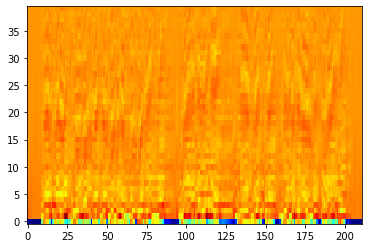

In [3]:
plt.imshow(mfcc,  origin='lower', cmap='jet', interpolation='nearest', aspect='auto')